In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as scp
from sklearn import metrics
import os

In [41]:
N = 100
def sin(x):
    return np.sin(x)

def sinx(x):
    return np.sin(1/x)

def sin8x(x):
    return np.sign(np.sin(8*x))

In [42]:
x = np.linspace(-np.pi,np.pi,N)
y = [sin(alfa) for alfa in x]
y_sinx = [sinx(alfa) for alfa in x]
y_sin8x = [sin8x(alfa) for alfa in x]

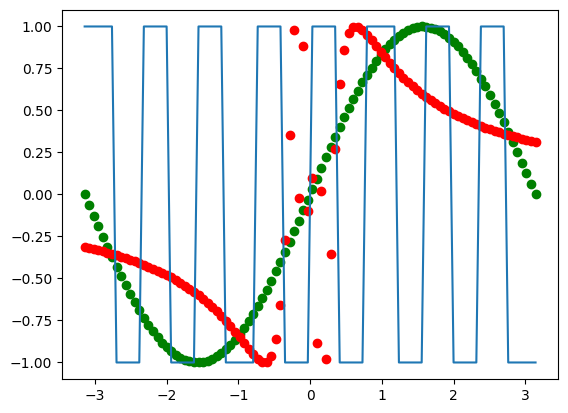

In [43]:
_ = plt.plot(x,y, 'go')
_ = plt.plot(x,y_sinx, 'ro')
_ = plt.plot(x,y_sin8x)

MSE: 0.00000007


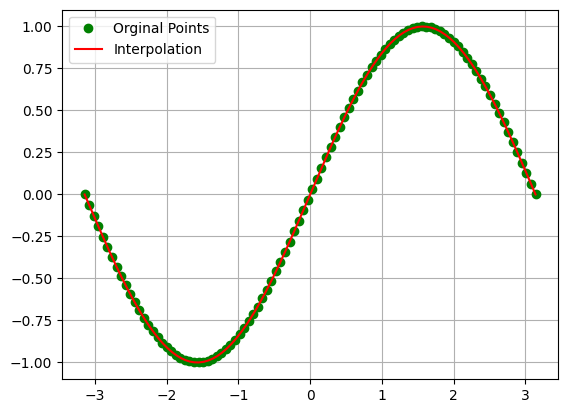

In [44]:
method = 'linear'

interpolated_function = scp.interp1d(x,y, kind= method)

x_int = np.linspace(x.min(), x.max(), 10*N)
y_int = interpolated_function(x_int)
y_true = sin(x_int)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_int, y_true=y_true):.8f}")

plt.plot(x, y, 'go', label='Orginal Points')
plt.plot(x_int, y_int, 'r-', label='Interpolation')
plt.grid(True)
plt.legend()
plt.savefig('sinx.png')
plt.show()

MSE: 0.13867987


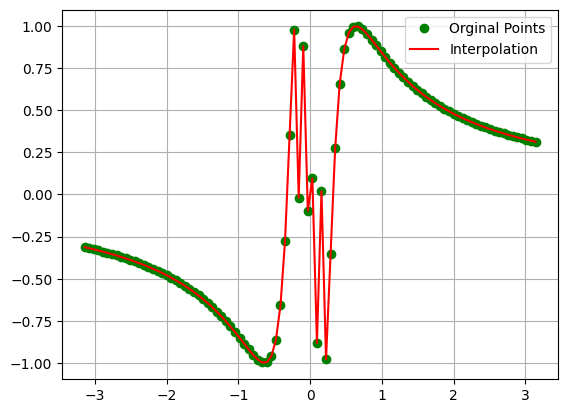

In [45]:
interpolated_function = scp.interp1d(x,y_sinx, kind= method)

x_int = np.linspace(x.min(), x.max(), N)
y_int = interpolated_function(x_int)
y_true = sin(x_int)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_int, y_true=y_true):.8f}")

plt.plot(x, y_sinx, 'go', label='Orginal Points')
plt.plot(x_int, y_int, 'r-', label='Interpolation')
plt.grid(True)
plt.legend()
plt.savefig('sin1_x.png')
plt.show()

MSE: 1.46493899


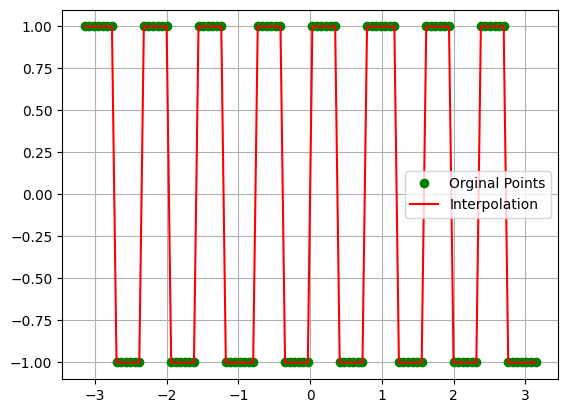

In [46]:
interpolated_function = scp.interp1d(x,y_sin8x, kind= method)

x_int = np.linspace(x.min(), x.max(), N)
y_int = interpolated_function(x_int)
y_true = sin(x_int)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_int, y_true=y_true):.8f}")

plt.plot(x, y_sin8x, 'go', label='Orginal Points')
plt.plot(x_int, y_int, 'r-', label='Interpolation')
plt.grid(True)
plt.legend()
plt.savefig('sin8x.png')
plt.show()

In [47]:
def h1(x):
    if(x>=0 and x<1):
        return 1
    else:
        return 0
    
def h2(x):
    if(x>= - 1 / 2 and x < 1 /2 ):
        return 1
    else:
        return 0
    
def h3(x):
    if( -1 <= x <= 1):
        return 1 - abs(x)
    else:
        return 0
    
def h4(x):
    return (np.sin(x) / x)

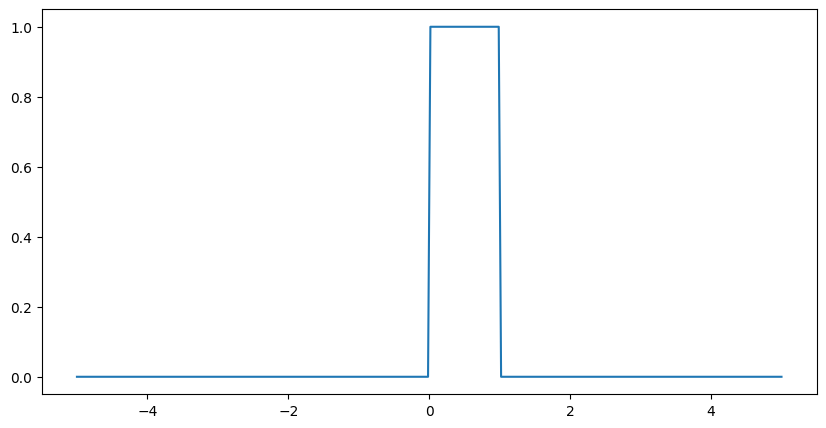

In [48]:
x = np.linspace(-5,5,300)
_ = plt.figure(figsize=[10,5])
y1 = []
y2 = []
y3 = []
y4 = []
for x0 in x:
    y1.append(h1(x0))
    y2.append(h2(x0))
    y3.append(h3(x0))
    y4.append(h4(x0))
_ = plt.plot(x,y1)

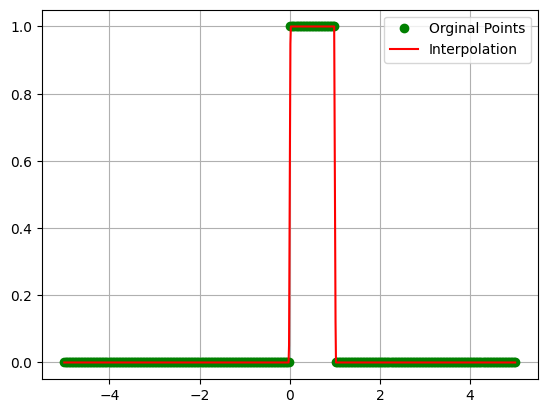

In [49]:
interpolated_function = scp.interp1d(x,y1, kind= method)

x_int = np.linspace(x.min(), x.max(), 10*N)
y_int = interpolated_function(x_int)

plt.plot(x, y1, 'go', label='Orginal Points')
plt.plot(x_int, y_int, 'r-', label='Interpolation')
plt.grid(True)
plt.legend()
plt.savefig('h1.png')
plt.show()

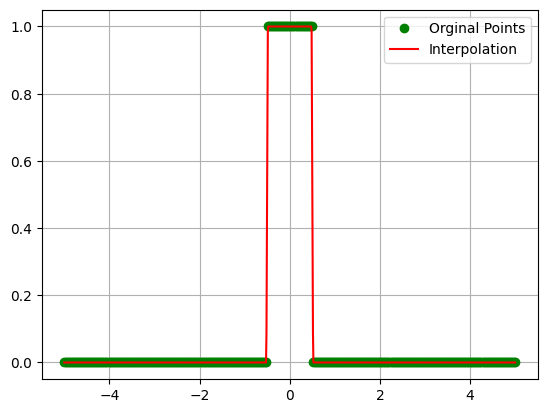

In [50]:
interpolated_function = scp.interp1d(x,y2, kind= method)

x_int = np.linspace(x.min(), x.max(), 10*N)
y_int = interpolated_function(x_int)

plt.plot(x, y2, 'go', label='Orginal Points')
plt.plot(x_int, y_int, 'r-', label='Interpolation')
plt.grid(True)
plt.legend()
plt.savefig('h2.png')
plt.show()

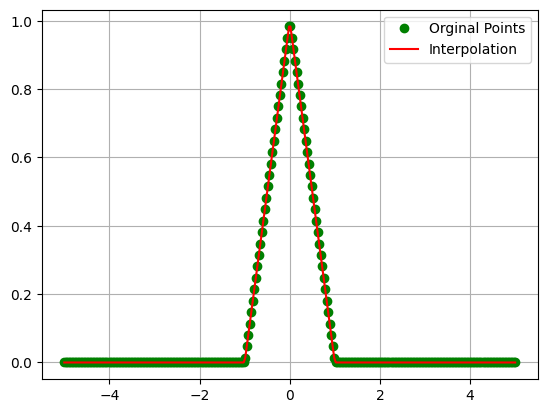

In [51]:
interpolated_function = scp.interp1d(x,y3, kind= method)

x_int = np.linspace(x.min(), x.max(), 10*N)
y_int = interpolated_function(x_int)

plt.plot(x, y3, 'go', label='Orginal Points')
plt.plot(x_int, y_int, 'r-', label='Interpolation')
plt.grid(True)
plt.legend()
plt.savefig('h3.png')
plt.show()

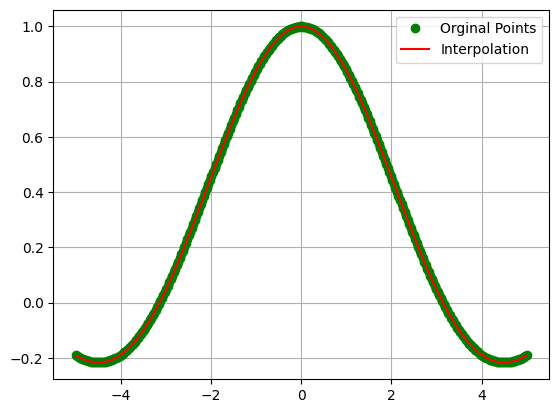

In [52]:
interpolated_function = scp.interp1d(x,y4, kind= method)

x_int = np.linspace(x.min(), x.max(), 10*N)
y_int = interpolated_function(x_int)

plt.plot(x, y4, 'go', label='Orginal Points')
plt.plot(x_int, y_int, 'r-', label='Interpolation')
plt.grid(True)
plt.legend()
plt.savefig('h4.png')
plt.show()

MSE: 0.05970255


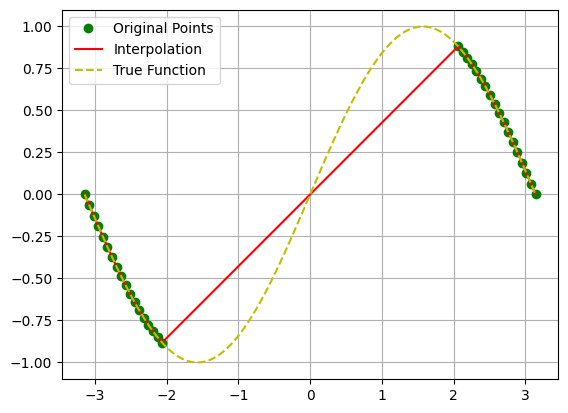

In [53]:
#Przypadek w którym funkcja interpolowana nie będzie ciągła / punkty nie będą równoodległe od siebie

N = 100
x = np.linspace(-np.pi, np.pi, N)
y = np.sin(x)

remove_mask = (x >= -2) & (x <= 2)
x = x[~remove_mask]
y = y[~remove_mask]

method = 'linear'
interpolated_function = scp.interp1d(x, y, kind=method)

x_int = np.linspace(x.min(), x.max(), 10*N)
y_int = interpolated_function(x_int)
y_true = np.sin(x_int)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_int, y_true=y_true):.8f}")
plt.plot(x, y, 'go', label='Original Points')
plt.plot(x_int, y_int, 'r-', label='Interpolation')
plt.plot(x_int, y_true, 'y--', label='True Function')
plt.grid(True)
plt.legend()
plt.savefig('without_some_points.png')
plt.show()


In [54]:
def interpolate(x, y, method, filename):
    interpolated_function = scp.interp1d(x, y, kind=method)
    x_int = np.linspace(x.min(), x.max(), N)
    y_int = interpolated_function(x_int)
    y_true = np.sin(x_int)

    print(f"MSE: {metrics.mean_squared_error(y_pred=y_int, y_true=y_true):.8f}")

    plt.plot(x, y, 'go', label='Original Points')
    plt.plot(x_int, y_int, 'r-', label='Interpolation')
    plt.grid(True)
    plt.legend()

    script_dir = os.path.dirname(__file__)
    save_path = os.path.join(script_dir, filename)

    plt.savefig(save_path)
    plt.clf()
    #plt.show()

MSE: 0.00000000


NameError: name '__file__' is not defined

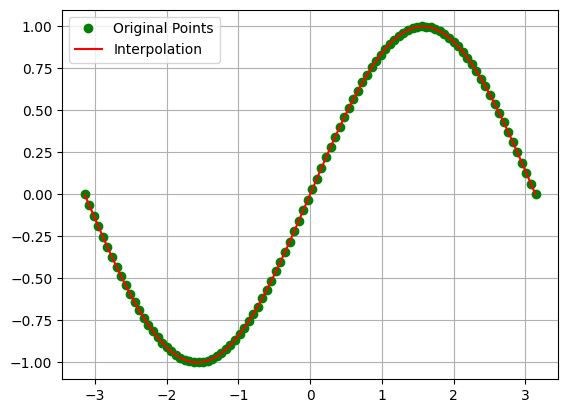

In [55]:
x = np.linspace(-np.pi, np.pi, N)
y = [sin(alfa) for alfa in x]
y_sinx = [sinx(alfa) for alfa in x]
y_sin8x = [sin8x(alfa) for alfa in x]

functions = [sin, sinx, sin8x]
filenames = ['sinx.png', 'sin1_x.png', 'sin8x.png']

for func, filename in zip(functions, filenames):
    y_values = [func(alfa) for alfa in x]
    interpolate(x, y_values, 'linear', filename)

In [57]:
def h1(x):
    if(x>=0 and x<1):
        return 1
    else:
        return 0
    
def h2(x):
    if(x>= - 1 / 2 and x < 1 /2 ):
        return 1
    else:
        return 0
    
def h3(x):
    if( -1 <= x <= 1):
        return 1 - abs(x)
    else:
        return 0
    
def h4(x):
    return (np.sin(x) / x)

In [58]:
def h_functions(h, x, method, filename):
    y = [h(x0) for x0 in x]

    _ = plt.figure(figsize=[10, 5])
    _ = plt.plot(x, y)

    interpolated_function = scp.interp1d(x, y, kind=method)
    x_int = np.linspace(x.min(), x.max(), 10 * N)
    y_int = interpolated_function(x_int)

    plt.plot(x, y, 'go', label='Orginal Points')
    plt.plot(x_int, y_int, 'r-', label='Interpolation')
    plt.grid(True)
    plt.legend()

    #script_dir = os.path.dirname(__file__)
    #save_path = os.path.join(script_dir, filename)

    #plt.savefig(save_path)
    plt.clf()
    plt.show()

In [59]:
x = np.linspace(-5, 5, 300)

h_functions(h1, x, 'linear', 'h1.png')
h_functions(h2, x, 'linear', 'h2.png')
h_functions(h3, x, 'linear', 'h3.png')
h_functions(h4, x, 'linear', 'h4.png')

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [60]:
N = 100
x = np.linspace(-np.pi, np.pi, N)
y = np.sin(x)

remove_mask = (x >= -2) & (x <= 2)
x = x[~remove_mask]
y = y[~remove_mask]

method = 'linear'
interpolated_function = scp.interp1d(x, y, kind=method)

x_int = np.linspace(x.min(), x.max(), 10*N)
y_int = interpolated_function(x_int)
y_true = np.sin(x_int)

print(f"MSE: {metrics.mean_squared_error(y_pred=y_int, y_true=y_true):.8f}")
plt.plot(x, y, 'go', label='Original Points')
plt.plot(x_int, y_int, 'r-', label='Interpolation')
plt.plot(x_int, y_true, 'y--', label='True Function')
plt.grid(True)
plt.legend()

#folder = os.path.dirname(os.path.abspath(__file__))
#filename = 'without_some_points.png'
#filepath = os.path.join(folder, filename)
#plt.savefig(filepath)
plt.clf()
plt.show()

MSE: 0.05970255


<Figure size 640x480 with 0 Axes>

N=5: MSE = 0.02230864
N=10: MSE = 0.00095917
N=20: MSE = 0.00004934
N=30: MSE = 0.00000913
N=70: MSE = 0.00000029


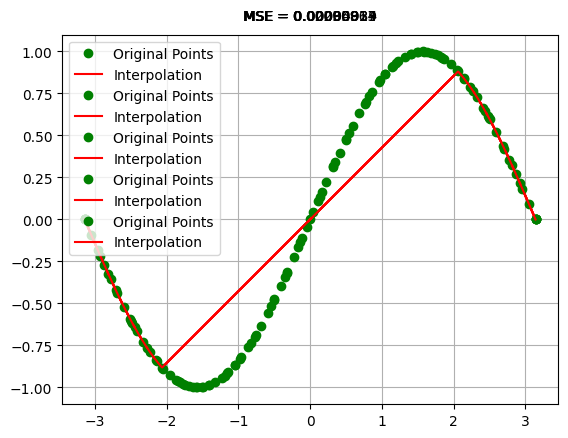

In [66]:
import numpy as np
from scipy.interpolate import interp1d
from sklearn import metrics

N_values = [5, 10, 20, 30, 70]

def interpolate_and_compute_mse(N):
    x = np.linspace(-np.pi, np.pi, N)
    y = np.sin(x)

    interpolated_function = interp1d(x, y, kind='linear', fill_value="extrapolate")

    x_true = np.linspace(-np.pi, np.pi, 10*N)  # Wartość N większa dla dokładniejszego wykresu
    y_true = np.sin(x_true)

    y_interp = interpolated_function(x_true)

    mse = metrics.mean_squared_error(y_true, y_interp)
    
    print(f"N={N}: MSE = {mse:.8f}")

    plt.plot(x, y, 'go', label='Original Points')
    plt.plot(x_int, y_int, 'r-', label='Interpolation')
    plt.grid(True)
    plt.legend()
    plt.text(0.5, 1.05, f'MSE = {mse:.8f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    
    #script_dir = os.path.dirname(__file__)
    #save_path = os.path.join(script_dir, filename)
    #plt.savefig(save_path)

for N in N_values:
    interpolate_and_compute_mse(N)


In [1]:
interpolate(x, y, 'linear', 'high_density_interpolation.png')

num_interpolations = 4
points_factor = 2

x_seq = x
y_seq = y

for _ in range(num_interpolations):
    x_seq_int = np.linspace(x_seq.min(), x_seq.max(), len(x_seq) * points_factor)
    interpolate(x_seq, y_seq, 'linear', 'sequence_interpolation.png')
    x_seq = x_seq_int
    y_seq = scp.interp1d(x_seq, y_seq, kind='linear')(x_seq_int)


NameError: name 'interpolate' is not defined